# The DARWIN Dataset

We'll be working with the DARWIN dataset. The DARWIN dataset includes handwriting data of 174 participants. And the task is to classify and distinguish Alzheimer's disease patients from healthy people.

## Motivation

This notebook intention is to focus on how to study a dataset, to perform feature selecting and to identify most relevant features in the dataset. The classification task and model are secondary and are dealt breifly at the end of the notebook.

Let's start by having a look at the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Remove annoying chained assignment warnings
# for more info see: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
pd.options.mode.chained_assignment = None # default='warn'


In [139]:
from ucimlrepo import fetch_ucirepo 

# Fetch dataset 
darwin = fetch_ucirepo(id=732) 
  
# Data (as pandas dataframes) 
X = darwin.data.features 
y = darwin.data.targets 

# Save the original data in case we need it later 
original_X = X.copy()
original_y = y.copy()

# Overview of the dataset
X.head()

,ID,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,...,mean_gmrt25,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25
0,id_1,5160,0.000013,120.804174,86.853334,957,6601,0.361800,0.217459,103.828754,...,249.729085,0.141434,0.024471,5.596487,3.184589,71,40120,1749.278166,296102.7676,144605
1,id_2,51980,0.000016,115.318238,83.448681,1694,6998,0.272513,0.144880,99.383459,...,77.258394,0.049663,0.018368,1.665973,0.950249,129,126700,1504.768272,278744.2850,298640
2,id_3,2600,0.000010,229.933997,172.761858,2333,5802,0.387020,0.181342,201.347928,...,193.667018,0.178194,0.017174,4.000781,2.392521,74,45480,1431.443492,144411.7055,79025
3,id_4,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,276.298223,...,163.065803,0.113905,0.019860,4.206746,1.613522,123,67945,1465.843329,230184.7154,181220
4,id_5,2310,0.000007,257.997131,111.275889,987,4732,0.266077,0.145104,184.636510,...,147.094679,0.121782,0.020872,3.319036,1.680629,92,37285,1841.702561,158290.0255,72575


### What are these features?

You might be a little surprised by this dataset, wasn t it supposed to include handwritten data? Why are the features labeled air_time1 or pressure_var25? If you re like me, you might have presumed the data to be composed by, perhaps, images of handwritten text, and this notebook were to involve a computer vision solution to it. Nevertheless, these are the features we have to work on and if you think a little bit, it makes perfect sense for the data to consist of pen and paper measurements rather than handwritten images.

Let's take a look at the dataset information

In [113]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Columns: 451 entries, ID to total_time25
dtypes: float64(300), int64(150), object(1)
memory usage: 613.2+ KB


Cool, so the data has 174 instances, and 451 features which 450 are numerical and 1 is categorical. The categorical column is certainly the ID column, composed of string objects.

In [ ]:
# TODO: check if this code is really necessary, output is too big
feature_names = X.columns.to_list()
i = 0
for name in feature_names:    
    if  i % 18 == 0:
        # Every 18 features print a line break
        print("")
        
    # If statement for formatting feature names to have the same length
    # i.e. air_time1 has 9 characters, nad air_time10 has 10
    if i < 180-18:
        print(name, end=" , ")
    else:
        print(name, end=", ")
    i += 1

### The features
The article [Handwriting Task-Selection based on the Analysis of Patterns in Classification Results on Alzheimer Dataset](https://ceur-ws.org/Vol-3521/paper2.pdf) has a good description of how the data and experiments were set-up. The article does the exact same thing we're trying to do here, so reading it feels like cheating let's only read a few things about the dataset for better understanding. From the article, we see that participants were asked to perform 25 handwriting taks and from each task 18 measurements were extracted using a digital table. 

From the article: "The extracted features are related to the time spent to complete the task (total time); such time were also divided in on-paper time and in-air time; the average speed, acceleration and jerk computed separately for on-paper movements and in-airmovements; mean and variance ofthe pressure; the Generalization of the Mean Relative Tremor (GMRT), which consists of the average of the sum of thedifferences between the i-th point and its d-th predecessor, firstly divided on-paper and in-air values, and the averagingthe previous values; the maximal extension about x and y axis; and finally the Dispersion Index which consists ofdividing the paper sheet in fixed-size boxes (e.g. 3x3) then counting how many boxes are covered by the handwritingtraits and successively dividing that number with the total amount of the boxes; in this way, the coverage ratio of thepaper sheet is computed."

A description for each task can be found in the article

Now that we have a good understanding of the data we can start by selecting the most relevant features in the dataset

## Feature Selection

Let's start by removing the categorical 'ID' column that we mentioned earlier.

In [140]:
# Drops the object columns
X.drop(X.select_dtypes(include='object').columns[0], axis='columns', inplace=True)

We can check for the target data aswell

In [119]:
# Check for class distribution and type
y.value_counts()

class
P        89
H        85
Name: count, dtype: int64

The classes are well balanced, however their types are not numerical. We can easily change that; checking the article 'H' labels the 85 healthy instances of the set, 'P' labels the subjects that suffer from Alzheimer 

In [141]:
# Map 'H' for healthy and 'P' for Alzheimer's to 0 and 1 respectively
y['class'] = y['class'].map( {'H': 0, 'P': 1} ).astype(int)

Check the missing values

In [121]:
# Check for missing values
X.isnull().values.any()

False

## Low variance filtering

In [142]:
var = X.var()
threshold = 0.10
low_var_features = var[var <= threshold].index
filtered_X = X.drop(columns=low_var_features)
filtered_X.shape

(174, 339)

## High Correlation Filtering

In [143]:
corr_matrix = X.corr()

for i in range(len(corr_matrix.columns)):
    for j in range(i):

        # Print variables with high correlation
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            print(corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j])

mean_acc_on_paper1 gmrt_on_paper1 0.8754776988010367
mean_gmrt1 gmrt_in_air1 0.9403247899487648
mean_gmrt1 gmrt_on_paper1 0.8280118833150759
mean_jerk_in_air1 mean_acc_in_air1 0.9880054182174897
mean_jerk_on_paper1 gmrt_on_paper1 0.7386899624424236
mean_jerk_on_paper1 mean_acc_on_paper1 0.8860710536615439
mean_speed_in_air1 gmrt_in_air1 0.8267493750697141
mean_speed_in_air1 mean_gmrt1 0.863950062247893
mean_speed_on_paper1 gmrt_on_paper1 0.985556702901547
mean_speed_on_paper1 mean_acc_on_paper1 0.8965237270042213
mean_speed_on_paper1 mean_gmrt1 0.82204122897459
mean_speed_on_paper1 mean_jerk_on_paper1 0.7493821561736261
paper_time1 disp_index1 0.8083750418981234
paper_time1 num_of_pendown1 0.7260579992580162
total_time1 air_time1 0.9729016440962951
total_time1 paper_time1 0.7571731577489984
mean_gmrt2 gmrt_in_air2 0.9322191541734152
mean_jerk_in_air2 mean_acc_in_air2 0.9945755216376909
mean_jerk_on_paper2 mean_acc_on_paper2 0.8184151065423867
mean_speed_on_paper2 gmrt_on_paper2 0.89653

In [144]:
# Calculate correlation matrix
correlation_matrix = filtered_X.corr()

# Set a correlation threshold (experiment with different values)
correlation_threshold = 0.80

# Identify highly correlated pairs
highly_correlated_pairs = np.where(np.abs(correlation_matrix) > correlation_threshold)

# Create a set to keep track of features to remove
features_to_remove = set()

# Loop through the pairs and decide which features to remove
for feature1, feature2 in zip(*highly_correlated_pairs):
    if feature1 != feature2 and feature1 not in features_to_remove:
        features_to_remove.add(feature2)

# Convert indices to column labels
columns_to_remove = [filtered_X.columns[idx] for idx in features_to_remove]

# Create a new DataFrame without highly correlated features
df_filtered = filtered_X.drop(columns=columns_to_remove)
df_filtered.shape

(174, 234)

## PCA filtering

In [145]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

original_columns = X.columns

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
num_components = 0.80 # Retain 80% of explained variance
pca = PCA(n_components=num_components)
principal_components = pca.fit_transform(X_scaled)

# Create a new DataFrame with the principal components
pc_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(pca.n_components_)])

# Map original column names to PC column names
pc_df.columns = [original_columns[i] for i in range(pca.n_components_)]

pc_df.shape

(174, 54)

## Building the Decision Tree model

### Model from the curated dataset

In [121]:
from sklearn.model_selection import train_test_split
# Separate features and target
X = pc_df

# Split the data into train and test sets
test_size = 0.2  # Proportion of data to allocate to the test set
random_state = 6  # Seed for reproducibility

from sklearn import tree
from sklearn.metrics import accuracy_score
scores = []
for random_state in range(1, 20):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Print the shapes of the resulting sets
    # print("X_train shape:", X_train.shape)
    # print("X_test shape:", X_test.shape)
    # print("y_train shape:", y_train.shape)
    # print("y_test shape:", y_test.shape)


    clf = tree.DecisionTreeClassifier(random_state=random_state)
    clf = clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    scores.append(score)

print("")
print(f"Dataset shape {X.shape}")
print(f"Mean accuracy: {np.mean(scores):.2f}")


Dataset shape (174, 54)
Mean accuracy: 0.75


### Model from the original dataset

In [122]:
X = original_X.copy()
y = original_y.copy()
X = X.drop(columns=['ID'])
y['class'] = y['class'].map( {'H': 0, 'P': 1} ).astype(int)
feature_names = X.columns.tolist()

scores = []

# Split the data into train and test sets
test_size = 0.2  # Proportion of data to allocate to the test set
for random_state in range(1, 20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    clf = tree.DecisionTreeClassifier(random_state=random_state)
    clf = clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    scores.append(score)

print("")
print(f"Dataset shape {X.shape}")
print(f"Mean accuracy: {np.mean(scores):.2f}")


Dataset shape (174, 450)
Mean accuracy: 0.74


In [104]:
from sklearn.neural_network import MLPClassifier

X = original_X.copy()
y = original_y.copy()
X = X.drop(columns=['ID'])
y['class'] = y['class'].map( {'H': 0, 'P': 1} ).astype(int)
feature_names = X.columns.tolist()

random_state = 42
test_size = 0.2 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(256, 450), random_state=random_state)

clf.fit(X_train, y_train)
clf.score(X_test, y_test)

/Users/eduardoduarte/miniconda3/envs/darwin/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/eduardoduarte/miniconda3/envs/darwin/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL: .

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.5714285714285714

In [ ]:
X = pc_df

random_state = 42
test_size = 0.2 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(256, 54), random_state=random_state)

clf.fit(X_train, y_train)
clf.score(X_test, y_test)

(174, 54)


/Users/eduardoduarte/miniconda3/envs/darwin/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9142857142857143

In [147]:
feature_names = X.columns.to_list()

def get_root_node(dt, feature_names):
    feature_idx = dt.tree_.feature[0]
    return feature_names[feature_idx]


n_repeats = 20
root_nodes = []

# variando o seed do holdout, geramos conjuntos de treino e teste um pouco diferentes a cada iteração
for split_random_state in range(0, n_repeats):
  # Holdout com 20% de dados de teste
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=split_random_state)

  # Treinamento da árvore usando os dados de treino
  dt = tree.DecisionTreeClassifier(random_state=0)
  dt.fit(X_train, y_train)

  # Obtemos o atributo usado na raiz e o salvamos na lista
  root_node = get_root_node(dt, feature_names)
  root_nodes.append(root_node)

root_nodes

['air_time1',
 'air_time1',
 'air_time1',
 'air_time1',
 'air_time1',
 'air_time1',
 'air_time1',
 'air_time1',
 'air_time1',
 'air_time1',
 'air_time1',
 'air_time1',
 'air_time1',
 'air_time1',
 'air_time1',
 'air_time1',
 'air_time1',
 'air_time1',
 'air_time1',
 'air_time1']

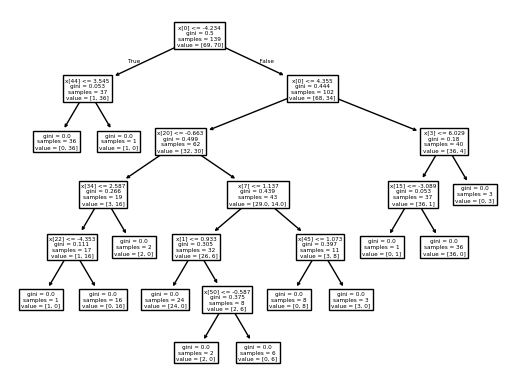

In [145]:
tree.plot_tree(clf)
plt.savefig('out.pdf')